In [4]:
import pandas as pd
import numpy as np
import sklearn.decomposition as PCA

In [53]:

df = pd.read_csv('data/2022-2023 Football Team Stats.csv', encoding='ISO-8859-1', delimiter=';') 
print(df.columns)
# print(df.describe())
# print(df.head(30))
print(len(df))

Index(['Rk', 'Squad', 'Country', 'LgRk', 'MP', 'W', 'D', 'L', 'GF', 'GA', 'GD',
       'Pts', 'Pts/MP', 'xG', 'xGA', 'xGD', 'xGD/90', 'Attendance',
       'Top Team Scorer', 'Goalkeeper'],
      dtype='object')
98


/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans

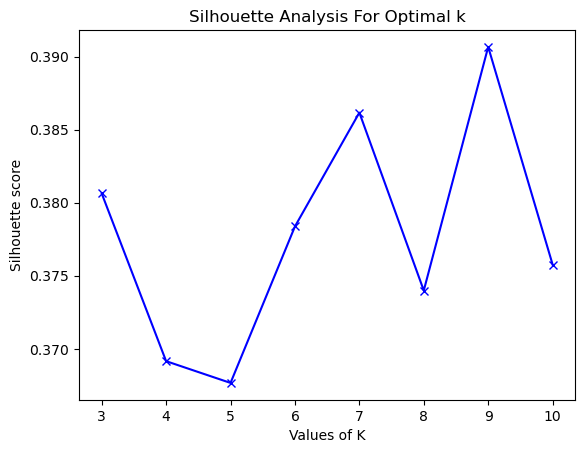

Optimal number of clusters: 9


/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [56]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans
import plotly.express as px
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv('data/2022-2023 Football Team Stats.csv', encoding='ISO-8859-1', delimiter=';')

# Basic Cleaning and Feature Engineering
# Drop columns that won't be used in clustering
squads = df['Squad']
df.drop(['Rk', 'Squad', 'Country', 'Top Team Scorer', 'Goalkeeper'], axis=1, inplace=True)

# Handle any missing values
df.fillna(df.mean(), inplace=True)

# Feature Engineering
# add or modify features based on domain knowledge
df['WinRate'] = df['W'] / df['MP']  # Example: Win rate
df['GoalDifferencePerMatch'] = df['GD'] / df['MP']  # Goal difference per match

# Select Features for Clustering
features = ['MP', 'WinRate', 'D', 'L', 'GF', 'GA', 'GoalDifferencePerMatch', 'Pts/MP', 'xG', 'xGA', 'xGD', 'xGD/90', 'Attendance']
df_numeric = df[features]

# Outlier Detection and Handling (Optional)
# This part is highly data-specific. You might use methods like IQR or Z-score to identify and handle outliers.

# Standardize and Normalize the data
scaler = MinMaxScaler()  # Using MinMaxScaler for normalization
df_scaled = scaler.fit_transform(df_numeric)

# PCA
pca = PCA(n_components=2)  # Reduce to 2 dimensions for visualization
principal_components = pca.fit_transform(df_scaled)
principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# Silhouette Score Analysis
range_n_clusters = list(range(3, 11))
silhouette_avg = []

for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(principal_df)
    silhouette_avg.append(silhouette_score(principal_df, cluster_labels))

# Plotting the Silhouette Scores
plt.plot(range_n_clusters, silhouette_avg, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Silhouette score')
plt.title('Silhouette Analysis For Optimal k')
plt.show()

# Choose the optimal number of clusters
optimal_clusters = range_n_clusters[silhouette_avg.index(max(silhouette_avg))]
print("Optimal number of clusters:", optimal_clusters)

# KMeans Clustering with Optimal Clusters
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
principal_df['Cluster'] = kmeans.fit_predict(principal_df[['PC1', 'PC2']])

# Add the team names back for visualization
principal_df['Team'] = squads

# Plot using Plotly
fig = px.scatter(principal_df, x='PC1', y='PC2', color='Cluster', hover_data=['Team'])
fig.update_layout(title='PCA and Clustering of Football Team Stats with Team Names on Hover')
fig.show()